In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [2]:
data_file = "../data/HousingData.csv"
houseDF = pd.read_csv(data_file)
houseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
houseDF_dropna = houseDF.dropna()
houseDF_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [4]:
featureDF = houseDF_dropna.drop(["MEDV"], axis=1)
targetSR = houseDF_dropna["MEDV"]


In [5]:
tree_model = DecisionTreeRegressor().fit(featureDF, targetSR)


In [6]:
importance = tree_model.feature_importances_
importance


array([0.04538444, 0.00322658, 0.01032129, 0.000626  , 0.01646532,
       0.60036419, 0.01188809, 0.04976738, 0.00072937, 0.01003223,
       0.02787793, 0.00366612, 0.21965105])

In [7]:
importanceDF = pd.DataFrame(importance, index=featureDF.columns, columns=["Importance"])
importanceDF.sort_values("Importance", ascending=False)


,Importance
RM,0.600364
LSTAT,0.219651
DIS,0.049767
CRIM,0.045384
PTRATIO,0.027878
NOX,0.016465
AGE,0.011888
INDUS,0.010321
TAX,0.010032
B,0.003666


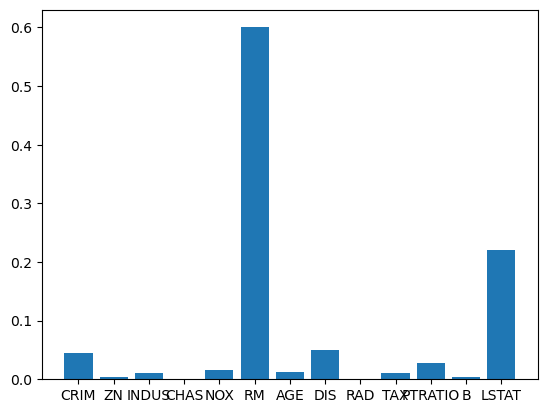

In [8]:
plt.bar(importanceDF.index, importanceDF["Importance"])
plt.show()
